## Ejemplo de dataframe con strings

In [1]:
import pandas as pd

df1 = pd.read_excel('datos (1) corregido.xlsx', skiprows=0)   

forzada_delitos = df1[['Entidadad federativa', 
                       '01/01/2025_Desaparición forzada de personas_Delitos',
                       '01/02/2025_Desaparicion forzada de personas_Delitos',
                       '01/03/2025_Desaparicion forzada de personas_Delitos',
                       ]]

# Renombrar las columnas del DataFrame forzada_delitos
forzada_delitos.columns = ['Entidad Federativa', 'Enero', 'Febrero', 'Marzo']

# Transformar el DataFrame forzada_delitos a formato long
forzada_delitos_long = pd.melt(
    forzada_delitos,
    id_vars=['Entidad Federativa'],  # Columnas que se mantendrán como identificadores
    var_name='Mes',                 # Nombre de la nueva columna que contendrá los nombres de las columnas originales
    value_name='Delitos'            # Nombre de la nueva columna que contendrá los valores
)

# Mostrar el DataFrame transformado
forzada_delitos_long

Entidad Federativa    Mes  Delitos
0        Aguascalientes   Enero        0
1        Baja California  Enero        1
2    Baja California Sur  Enero        0
3               Campeche  Enero        0
4                Chiapas  Enero        1
..                   ...    ...      ...
97              Veracruz  Marzo        0
98               Yucatán  Marzo        0
99             Zacatecas  Marzo        0
100             Nacional  Marzo       11
101                  FGR  Marzo        4

[102 rows x 3 columns]

## Ejemplo de dataframe con fechas

In [2]:
import pandas as pd
import numpy as np

# Generar un rango de fechas
fechas = pd.date_range(start="2025-01-01", end="2025-12-31", freq="ME")

# Crear un DataFrame con datos aleatorios
data = {
    'Fecha': np.random.choice(fechas, size=1000),  # Seleccionar 1000 fechas aleatorias
    'Desaparecidos': np.random.randint(0, 100, size=1000),
    'Localizados': np.random.randint(0, 100, size=1000),
    'No localizados': np.random.randint(0, 100, size=1000)
}

df_fechas = pd.DataFrame(data)

# Transformar el DataFrame a formato long
df_fechas_long = pd.melt(
    df_fechas,
    id_vars=['Fecha'],  # Usar las fechas como identificadores
    var_name='Clasificación',     # Nombre de la nueva columna que contendrá los nombres de las columnas originales
    value_name='Cantidad'  # Nombre de la nueva columna que contendrá los valores
)

df_fechas_long = df_fechas_long.drop_duplicates()

df_fechas_long = df_fechas_long.fillna(0)

df_fechas_long = df_fechas_long.groupby(['Fecha', 'Clasificación'], as_index=False)['Cantidad'].sum()

df_fechas_long

Fecha   Clasificación  Cantidad
0  2025-01-31   Desaparecidos      2872
1  2025-01-31     Localizados      2548
2  2025-01-31  No localizados      2708
3  2025-02-28   Desaparecidos      2763
4  2025-02-28     Localizados      2874
5  2025-02-28  No localizados      2967
6  2025-03-31   Desaparecidos      2792
7  2025-03-31     Localizados      2499
8  2025-03-31  No localizados      2647
9  2025-04-30   Desaparecidos      2390
10 2025-04-30     Localizados      2494
11 2025-04-30  No localizados      2883
12 2025-05-31   Desaparecidos      3085
13 2025-05-31     Localizados      3597
14 2025-05-31  No localizados      3335
15 2025-06-30   Desaparecidos      2709
16 2025-06-30     Localizados      2811
17 2025-06-30  No localizados      2957
18 2025-07-31   Desaparecidos      2368
19 2025-07-31     Localizados      2758
20 2025-07-31  No localizados      2804
21 2025-08-31   Desaparecidos      2098
22 2025-08-31     Localizados      2481
23 2025-08-31  No localizados      2402
24 2025-09-30   Desaparecidos      2847
25 2025-09-30     Localizados      2599
26 2025-09-30  No localizados      2398
27 2025-10-31   Desaparecidos      2960
28 2025-10-31     Localizados      2789
29 2025-10-31  No localizados      2681
30 2025-11-30   Desaparecidos      3065
31 2025-11-30     Localizados      2489
32 2025-11-30  No localizados      2657
33 2025-12-31   Desaparecidos      2833
34 2025-12-31     Localizados      2884
35 2025-12-31  No localizados      2518

## Código a copiar:

In [3]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if "Poppins" in font.name:
        print(font.name)

Ancho cápsula horizontal: 950.1784946236567
Ancho cápsula horizontal: 1090.0134677419355
Ancho cápsula horizontal: 1041.8472580645175
Ancho cápsula horizontal: 1004.2047580645158
Ancho cápsula horizontal: 1262.4247379032258
Ancho cápsula horizontal: 1211.0606854838697
Ancho cápsula horizontal: 1213.4168346774186
Ancho cápsula horizontal: 1178.5458266129026
Ancho cápsula horizontal: 1249.2303024193534
Ancho cápsula horizontal: 1261.0110483870958
Ancho cápsula horizontal: 1097.9655241935488
Ancho cápsula horizontal: 1232.737258064517


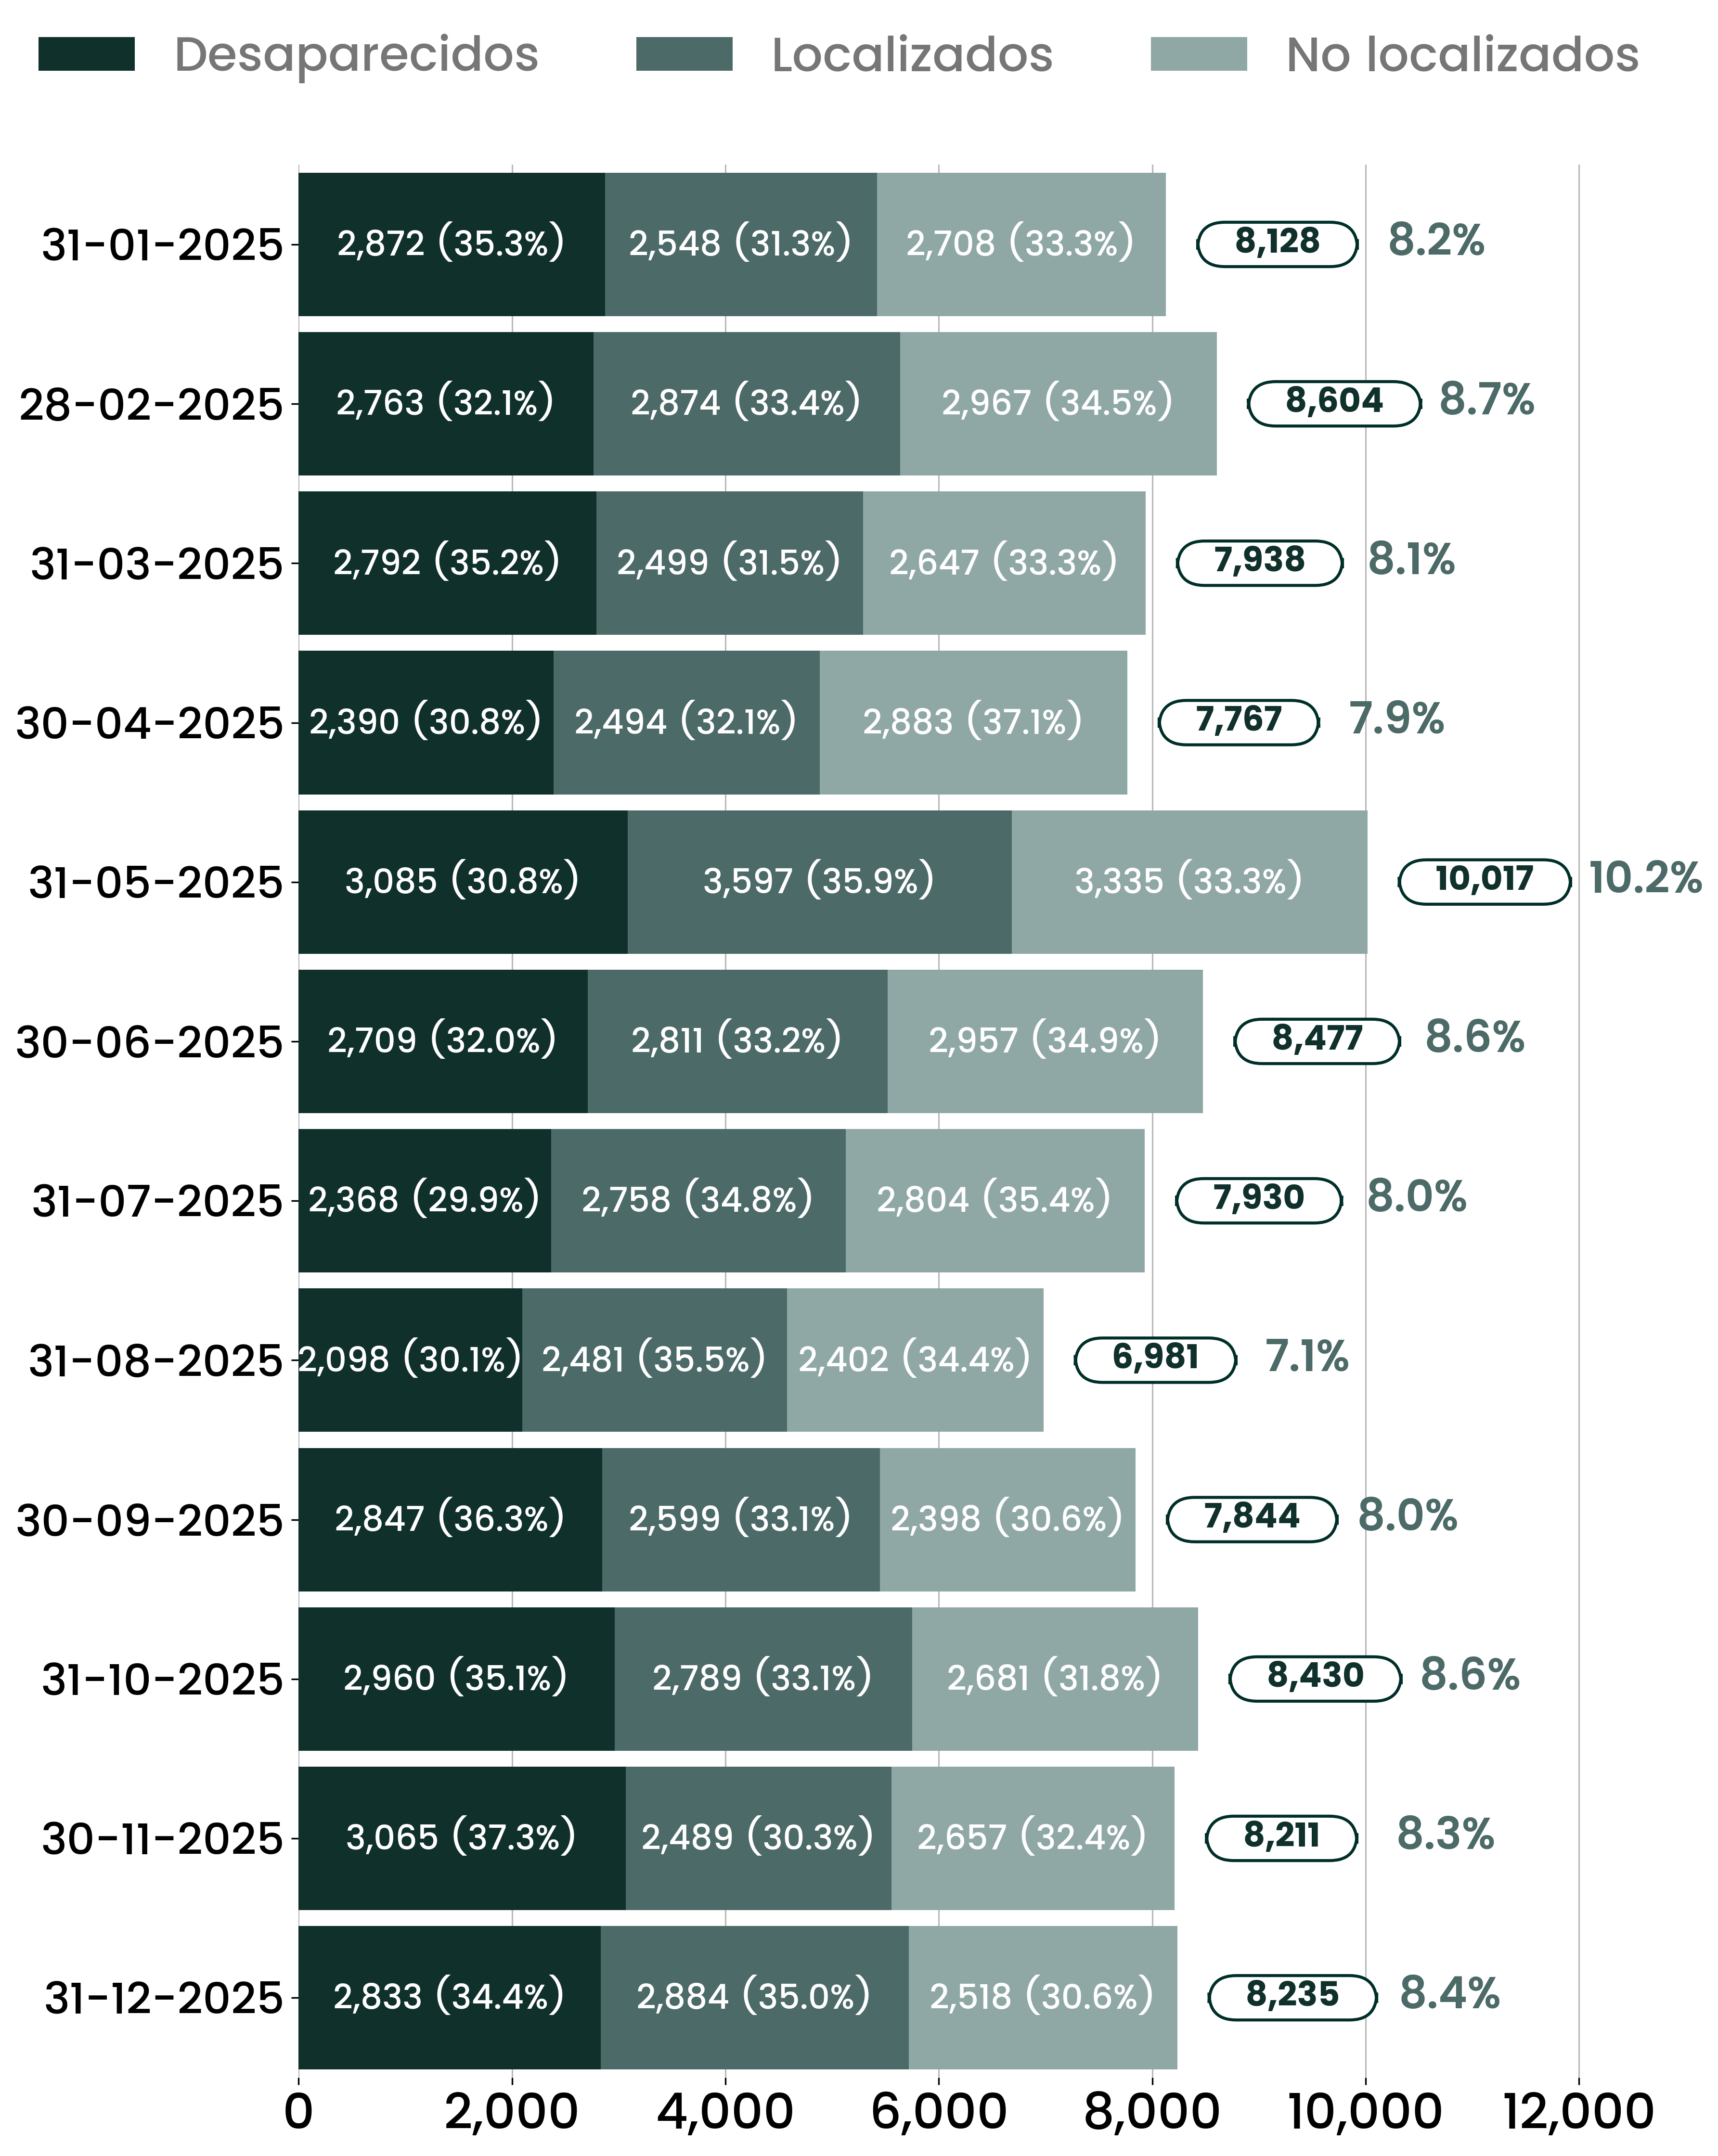

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from statistics import mode

def formato_fechas(fechas):
    """
    Recibe una lista, Series o Index de fechas (datetime).
    Si todas las fechas solo difieren en el año, regresa solo el año como string.
    Si difieren en mes o día, regresa en formato dd-mm-YYYY.
    """
    fechas = pd.to_datetime(fechas)
    mismos_mes = fechas.month.nunique() == 1
    mismos_dia = fechas.day.nunique() == 1
    if mismos_mes and mismos_dia:
        return [str(f.year) for f in fechas]
    else:
        return [f.strftime("%d-%m-%Y") for f in fechas]

def barras_apiladas(
    df_long, 
    bar_height=0.5, 
    nombre=None,
    font='Montserrat',
    fontsize_barra=15, 
    valor_barra=False, 
    porcentaje_barra=False, 
    porcentaje_total=False, 
    orientacion='horizontal',
    ordenar_por='valor',      # 'valor' o 'etiqueta'
    orden='descendente'       # 'ascendente' o 'descendente'
):
    # Configuración de la fuente
    font_config = {
        'family': font,
        'variable_x': {'size': 25, 'weight': 'medium', 'color': '#000000'},
        'variable_y': {'size': 22, 'weight': 'medium', 'color': '#000000'},
        'valor_capsula': {'size': fontsize_barra, 'weight': 'bold', 'color': '#10302C'},
        'valor_porcentaje_barra': {'size': fontsize_barra, 'weight': 'medium', 'color': '#ffffff'},
        'porcentaje_total': {'size': 22, 'weight': 'semibold', 'color': '#4C6A67'},
        'leyenda': {'size': 24, 'weight': 'medium', 'color': '#767676'}
    }

    plt.rcParams['svg.fonttype'] = 'none'
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    nombre_df = nombre or "barras_apiladas"
    colores_asignados = ["#10302C", "#4C6A67", "#8FA8A6", "#A3C9A8"]

    # Pivotear el DataFrame y calcular totales
    df_pivot = df_long.pivot(index=df_long.columns[0], columns=df_long.columns[1], values=df_long.columns[2]).fillna(0)
    suma_total = df_pivot.sum(axis=1)

    # ORDENAMIENTO
    if ordenar_por == 'valor':
        sort_index = suma_total.sort_values(ascending=(orden == 'ascendente')).index
    elif ordenar_por == 'etiqueta':
        sort_index = sorted(df_pivot.index, reverse=(orden == 'descendente'))
    else:
        sort_index = df_pivot.index  # sin ordenar si valor inválido

    df_pivot = df_pivot.loc[sort_index]
    suma_total = suma_total.loc[sort_index]
    total_general = suma_total.sum()

    entidades = df_pivot.index.values
    if hasattr(df_pivot.index, "dtype") and str(df_pivot.index.dtype).startswith("datetime"):
        entidades_formateadas = formato_fechas(df_pivot.index)
    else:
        entidades_formateadas = df_pivot.index.values

    valores = [df_pivot[col].values for col in df_pivot.columns]
    categorias = df_pivot.columns
    posiciones = np.arange(len(entidades))

    # --- Ajuste del ancho de la figura según el ancho de las cápsulas ---
    if orientacion == 'vertical':
        longitudes = []
        for total_valor in suma_total:
            espacio = "\u00A0"
            texto_capsula = f"{espacio*4}{int(total_valor):,}{espacio*4}"
            longitudes.append(len(texto_capsula))
        if longitudes:
            moda_capsula_len = mode(longitudes)
        else:
            moda_capsula_len = 10
        extra_width = moda_capsula_len * 0.1
        base_width = max(12, len(entidades)*extra_width)
        fig_width = base_width 
        fig, ax = plt.subplots(figsize=(fig_width, 8), dpi=300)
    else:
        fig, ax = plt.subplots(figsize=(12, 15), dpi=300)
    # ---------------------------------------------------------------

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    x_max = suma_total.max() * 1.15

    # Ajustar los márgenes
    if orientacion == 'horizontal':
        ax.set_ylim(-0.5, len(entidades) - 0.5)
    else:
        ax.set_xlim(-0.5, len(entidades) - 0.5)

    # Dibujar barras apiladas
    for pos, entidad, total_valor in zip(posiciones, entidades, suma_total):
        left = 0
        for i, valor in enumerate(valores):
            color = colores_asignados[i % len(colores_asignados)]
            label = categorias[i] if pos == 0 else None
            if orientacion == 'horizontal':
                if valor[pos] > 0:
                    ax.barh(pos, valor[pos], height=bar_height, left=left, color=color, edgecolor='none', zorder=2, label=label)
                    if porcentaje_barra or valor_barra:
                        texto = f"{valor[pos]:,.0f}" if valor_barra else ""
                        if porcentaje_barra:
                            porcentaje_valor = (valor[pos] / total_valor) * 100 if total_valor > 0 else 0
                            texto += f" ({porcentaje_valor:.1f}%)" if valor_barra else f"{porcentaje_valor:.1f}%"
                        ax.text(left + valor[pos] / 2, pos, texto, va='center', ha='center',
                                fontsize=font_config['valor_porcentaje_barra']['size'],
                                fontfamily=font_config['family'],
                                fontweight=font_config['valor_porcentaje_barra']['weight'],
                                color=font_config['valor_porcentaje_barra']['color'])
                left += valor[pos]
            else:
                if valor[pos] > 0:
                    ax.bar(pos, valor[pos], width=bar_height, bottom=left, color=color, edgecolor='none', zorder=2, label=label)
                    if porcentaje_barra or valor_barra:
                        texto = f"{valor[pos]:,.0f}" if valor_barra else ""
                        if porcentaje_barra:
                            porcentaje_valor = (valor[pos] / total_valor) * 100 if total_valor > 0 else 0
                            texto += f" ({porcentaje_valor:.1f}%)" if valor_barra else f"{porcentaje_valor:.1f}%"
                        ax.text(pos, left + valor[pos] / 2, texto, va='center', ha='center',
                                fontsize=font_config['valor_porcentaje_barra']['size'],
                                fontfamily=font_config['family'],
                                fontweight=font_config['valor_porcentaje_barra']['weight'],
                                color=font_config['valor_porcentaje_barra']['color'])
                left += valor[pos]

        if orientacion == 'horizontal':
            espacio = "\u00A0"
            texto_capsula = f"{espacio*4}{int(total_valor):,}{espacio*4}"
            t = ax.text(total_valor + x_max * 0.03, pos, texto_capsula,
                    bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor='white', edgecolor='#002F2A', linewidth=1.5),
                    ha='left', va='center',
                    fontsize=font_config['valor_capsula']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['valor_capsula']['weight'],
                    color=font_config['valor_capsula']['color'])
        else:
            espacio = "\u00A0"
            texto_capsula = f"{espacio*2}{int(total_valor):,}{espacio*2}"
            t = ax.text(pos, total_valor + x_max * 0.03, texto_capsula,
                    bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor='white', edgecolor='#002F2A', linewidth=1.5),
                    ha='center', va='bottom',
                    fontsize=font_config['valor_capsula']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['valor_capsula']['weight'],
                    color=font_config['valor_capsula']['color'])

        # Calcular el ancho de la cápsula en coordenadas de datos
        fig.canvas.draw()
        renderer = fig.canvas.get_renderer()
        bbox = t.get_window_extent(renderer=renderer)
        inv = ax.transData.inverted()
        bbox_data = inv.transform([[bbox.x0, bbox.y0], [bbox.x1, bbox.y1]])
        if orientacion == 'horizontal':
            ancho_capsula = bbox_data[1][0] - bbox_data[0][0]
            print(f"Ancho cápsula horizontal: {ancho_capsula}")
        else:
            ancho_capsula = bbox_data[1][1] - bbox_data[0][1]
            print(f"Ancho cápsula vertical: {ancho_capsula}")

        # Mostrar porcentaje total al lado derecho de la cápsula
        if porcentaje_total:
            porcentaje = round((total_valor / total_general) * 100, 1)
            if orientacion == 'horizontal':
                ax.text(
                        total_valor + x_max * 0.18, pos, f"{porcentaje}%",
                        ha='left', va='center',
                        fontsize=font_config['porcentaje_total']['size'],
                        fontfamily=font_config['family'],
                        fontweight=font_config['porcentaje_total']['weight'],
                        color=font_config['porcentaje_total']['color'])
            else:
                ax.text(
                        pos, total_valor + x_max * 0.15, f"{porcentaje}%",
                        ha='center', va='bottom',
                        fontsize=font_config['porcentaje_total']['size'],
                        fontfamily=font_config['family'],
                        fontweight=font_config['porcentaje_total']['weight'],
                        color=font_config['porcentaje_total']['color'])

    # Configurar ejes y etiquetas
    if orientacion == 'horizontal':
        ax.set_yticks(posiciones)
        ax.set_yticklabels(entidades_formateadas, fontsize=font_config['variable_y']['size'], fontweight=font_config['variable_y']['weight'], fontfamily=font_config['family'])
        ax.invert_yaxis()
        ax.set_xlim(0, 1.1 * x_max)
        ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.setp(ax.get_xticklabels(),
                 fontsize=font_config['variable_x']['size'],
                 fontweight=font_config['variable_x']['weight'],
                 fontfamily=font_config['family'],
                 color=font_config['variable_x']['color'])
        ax.grid(visible=True, axis='x', color='#B9B9B9', linewidth=0.75, linestyle='-')
    else:
        ax.set_xticks(posiciones)
        ax.set_xticklabels(entidades_formateadas, fontsize=font_config['variable_x']['size'], fontweight=font_config['variable_x']['weight'], fontfamily=font_config['family'], rotation=90, ha='right')
        ax.set_ylim(0, 1.1 * x_max)
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.setp(ax.get_yticklabels(),
                 fontsize=font_config['variable_y']['size'],
                 fontweight=font_config['variable_y']['weight'],
                 fontfamily=font_config['family'],
                 color=font_config['variable_y']['color'])
        ax.grid(visible=True, axis='y', color='#B9B9B9', linewidth=0.75, linestyle='-')

    # Quitar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Leyenda (solo si hay handles)
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, fontsize=font_config['leyenda']['size'], loc='lower center', bbox_to_anchor=(0.4, 1.02), ncol=len(df_pivot.columns), frameon=False,
                  prop=font_manager.FontProperties(family=font_config['family'], size=font_config['leyenda']['size'], weight=font_config['leyenda']['weight']),
                  labelcolor=font_config['leyenda']['color'])

    plt.tight_layout()
    plt.savefig(f"{nombre_df}.svg", format='svg', bbox_inches='tight', dpi=300)
    plt.savefig(f"{nombre_df}.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()
    
barras_apiladas(df_fechas_long, 
                nombre="df_fechas_long_horizontal", 
                bar_height=0.9, 
                font='Poppins',
                fontsize_barra=17,
                valor_barra=True, 
                porcentaje_barra=True, 
                porcentaje_total=True,
                orientacion='horizontal',
                ordenar_por='etiqueta',
                orden='ascendente'
                )

## Otros ejemplos de uso:

Ancho cápsula vertical: 472.39261363636433
Ancho cápsula vertical: 472.39261363636433
Ancho cápsula vertical: 472.39261363636433
Ancho cápsula vertical: 472.39261363636433
Ancho cápsula vertical: 472.3926136363625
Ancho cápsula vertical: 472.39261363636433
Ancho cápsula vertical: 472.3926136363625
Ancho cápsula vertical: 472.39261363636433
Ancho cápsula vertical: 472.3926136363625
Ancho cápsula vertical: 472.3926136363625
Ancho cápsula vertical: 472.3926136363625
Ancho cápsula vertical: 472.3926136363625


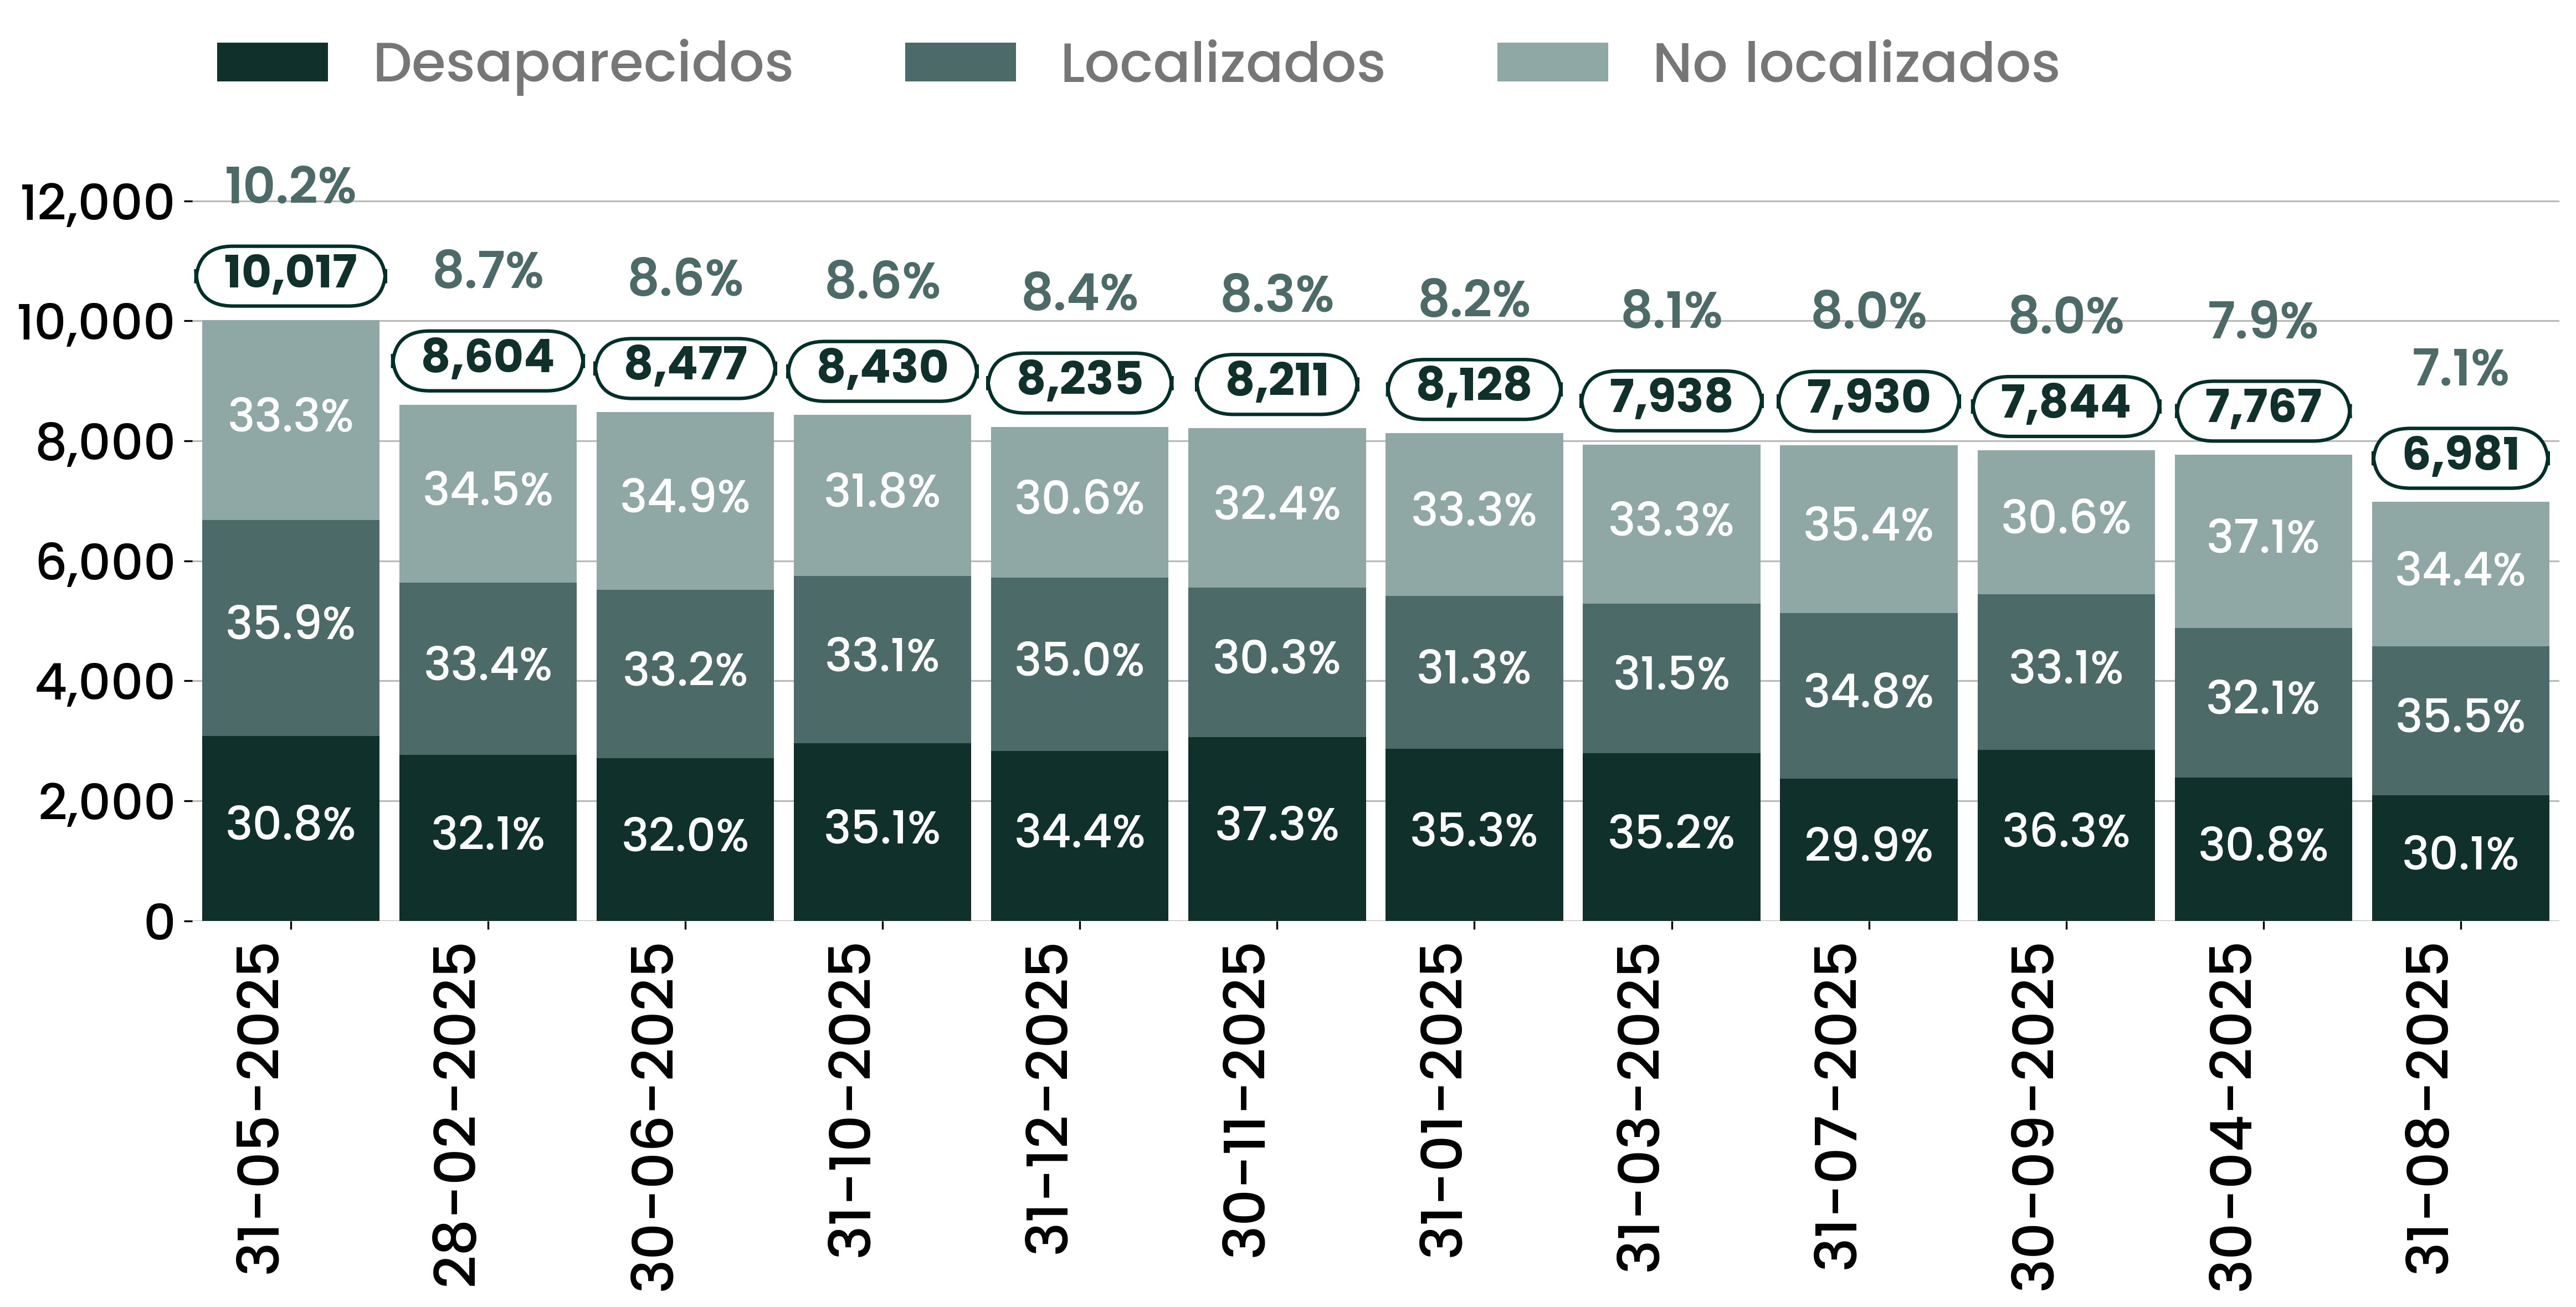

In [5]:
barras_apiladas(df_fechas_long, 
                nombre="df_fechas_long_vertical", 
                bar_height=0.9, 
                font='Poppins',
                fontsize_barra=20,
                valor_barra=False, 
                porcentaje_barra=True, 
                porcentaje_total=True,
                orientacion='vertical'
                )

Ancho cápsula horizontal: 0.08803763440860202
Ancho cápsula horizontal: 0.2691330645161285
Ancho cápsula horizontal: 0.25022177419354796
Ancho cápsula horizontal: 0.2773185483870968
Ancho cápsula horizontal: 0.26899193548387146
Ancho cápsula horizontal: 0.25022177419354796
Ancho cápsula horizontal: 0.26899193548387146
Ancho cápsula horizontal: 0.2773185483870968
Ancho cápsula horizontal: 0.26899193548387146
Ancho cápsula horizontal: 0.2773185483870968
Ancho cápsula horizontal: 0.25022177419354796
Ancho cápsula horizontal: 1.873064516129034
Ancho cápsula horizontal: 1.6639112903225803
Ancho cápsula horizontal: 1.5013306451612909
Ancho cápsula horizontal: 1.6639112903225803
Ancho cápsula horizontal: 1.5013306451612909
Ancho cápsula horizontal: 1.5013306451612909
Ancho cápsula horizontal: 1.6639112903225803
Ancho cápsula horizontal: 2.707325268817204
Ancho cápsula horizontal: 2.310987903225806
Ancho cápsula horizontal: 2.085181451612903
Ancho cápsula horizontal: 2.085181451612903
Ancho cá

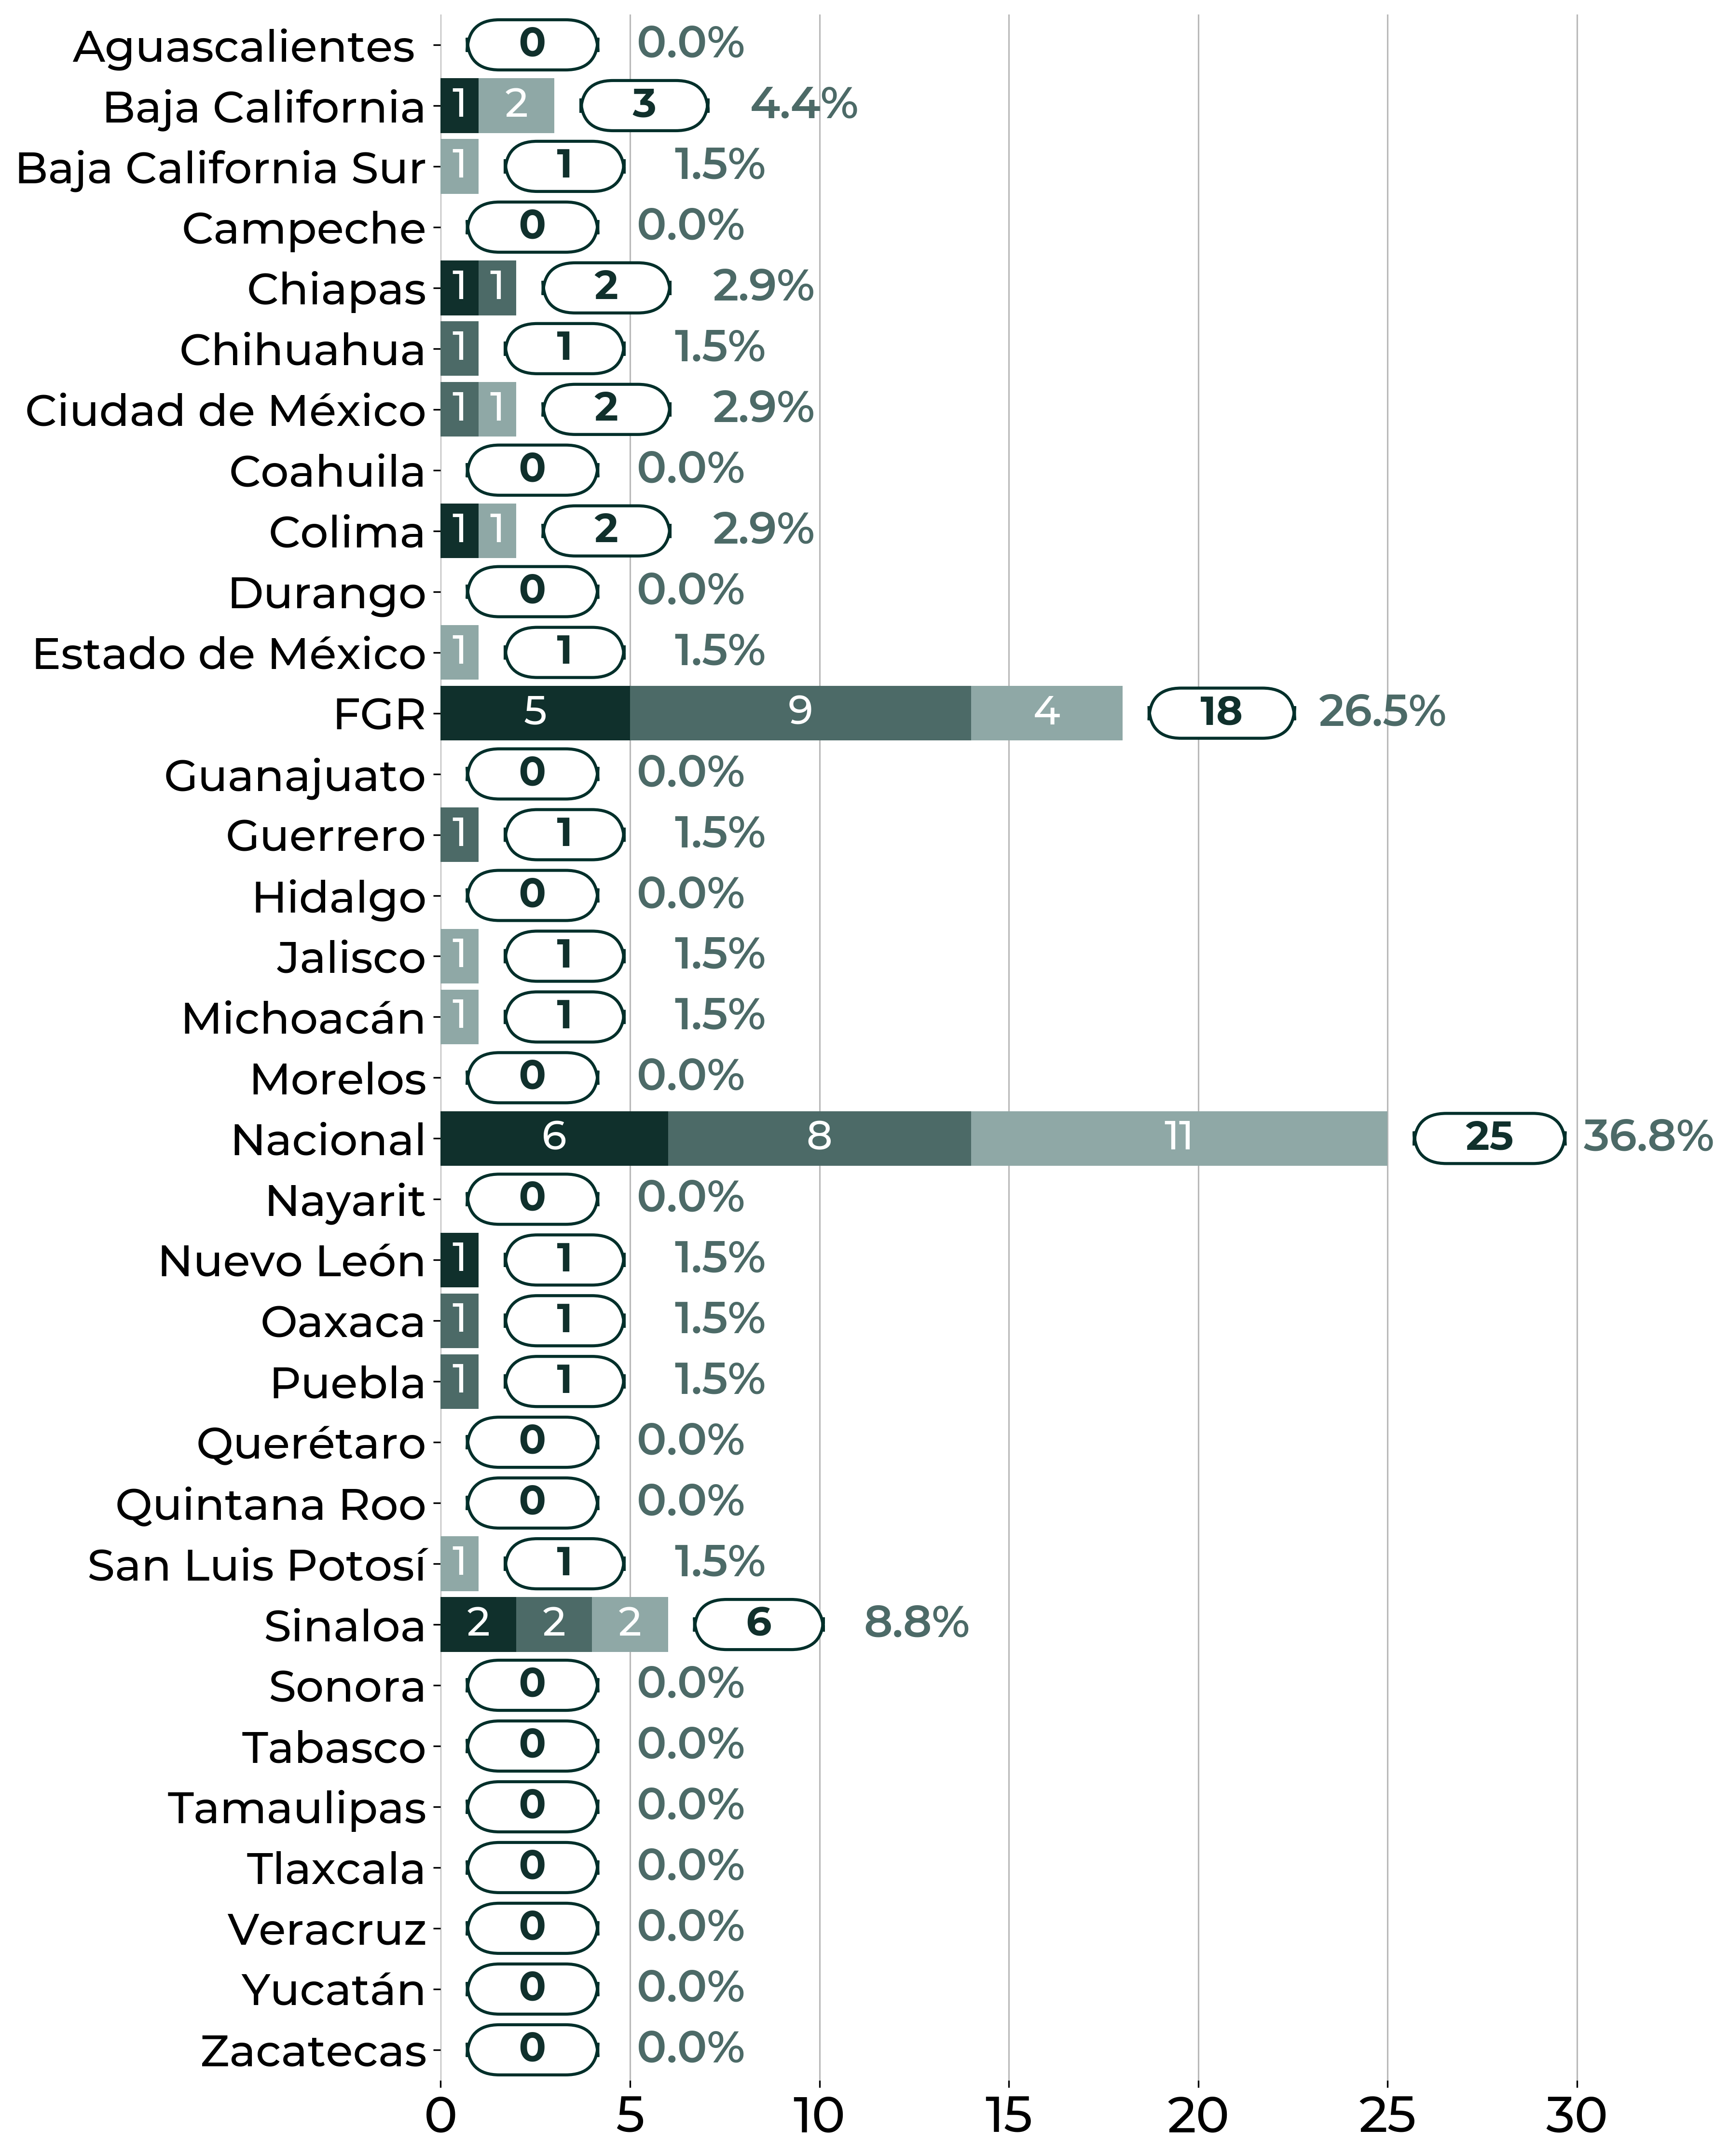

In [6]:
barras_apiladas(forzada_delitos_long, 
                nombre="forzada_delitos_long_horizontal", 
                bar_height=0.9, 
                font='Montserrat',
                valor_barra=True, 
                fontsize_barra=20,
                porcentaje_barra=False, 
                porcentaje_total=True,
                orientacion='horizontal',
                ordenar_por='etiqueta',
                orden='ascendente'
                )

Ancho cápsula vertical: 0.8238636363636331
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636362
Ancho cápsula vertical: 0.8238636363636358
Ancho cápsula vertical: 0.8238636363636358
Ancho cápsula vertical: 0.8238636363636358
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsula vertical: 0.8238636363636367
Ancho cápsu

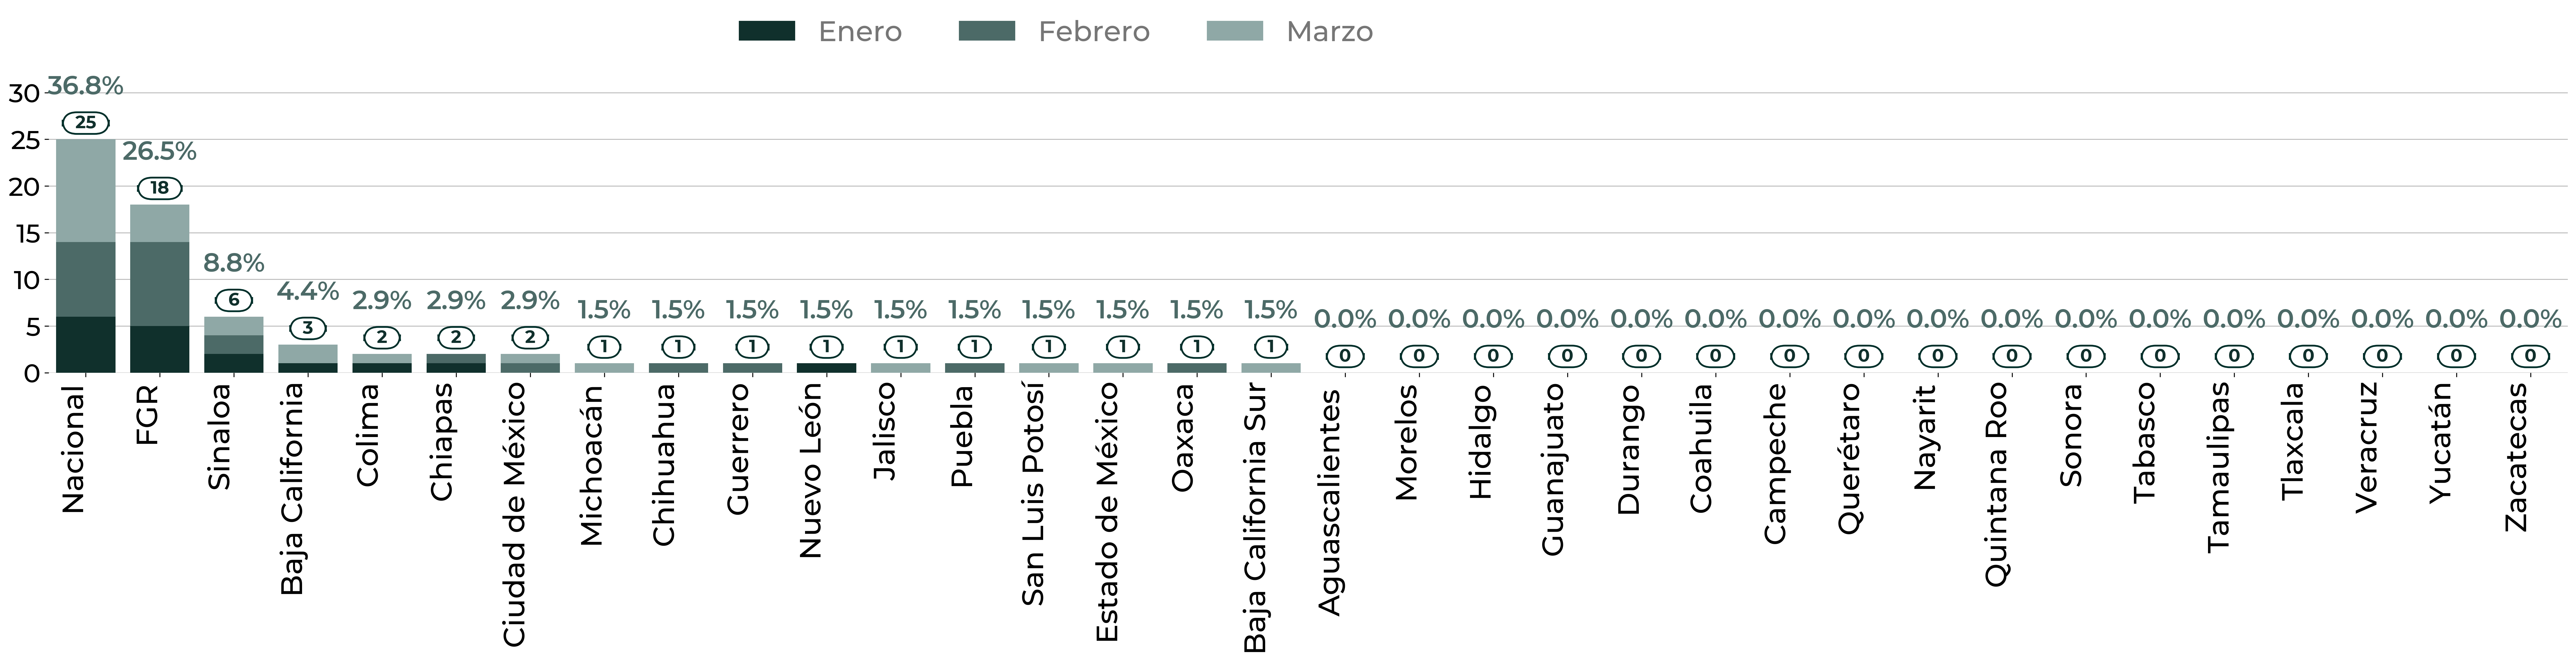

In [7]:
barras_apiladas(forzada_delitos_long, 
                nombre="forzada_delitos_long_vertical", 
                bar_height=0.8, 
                font='Montserrat',
                valor_barra=False, 
                porcentaje_barra=False, 
                porcentaje_total=True,
                orientacion='vertical'
                )